In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score, f1_score,log_loss ,matthews_corrcoef, confusion_matrix, accuracy_score, log_loss, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import IPython.display as ipd
import warnings
pd.set_option('future.no_silent_downcasting', True)
%matplotlib inline

In [2]:
path = "/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [6]:
df[' Label'] = df[' Label'].replace({'BENIGN': 0, 'DDoS': 1})

In [7]:
df[' Label'].value_counts()

 Label
1    128027
0     97718
Name: count, dtype: int64

In [8]:
df.shape

(225745, 79)

In [9]:
df[' Label'] = df[' Label'].astype('int64')

In [10]:
df.keys()

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [11]:
df.describe()

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06,1.000000
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


In [12]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Flow Bytes/s']

In [13]:
df.dropna(inplace = True)

In [14]:
has_inf_rows = df.map(np.isinf).any(axis=1)
df.drop(index=df[has_inf_rows].index, inplace=True)

In [15]:
has_inf = df.map(np.isinf).any().any()
has_nan = df.isnull().values.any()
if has_inf:
    print("The DataFrame contains infinite values.")
else:
    print("No Infinte Values")
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("No NaN Values")

No Infinte Values
No NaN Values


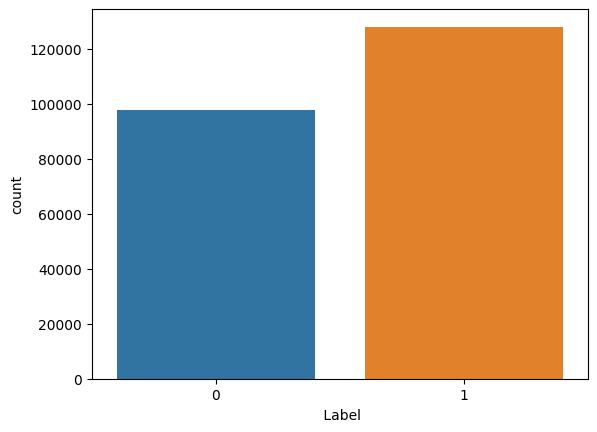

In [16]:
sns.countplot(x=' Label', data=df)
plt.show()

## **Ensemble Machine Learning algorithm**

In [17]:
predictorNames = [' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']

In [18]:
predictors = df[predictorNames]

In [19]:
response = df[' Label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# **Boasting (Adaboast Classifier) {1}** #

In [21]:
template = DecisionTreeClassifier(max_depth=5)

In [22]:
classificationEnsemble = AdaBoostClassifier(estimator=template,
                                             n_estimators=100,
                                             learning_rate=0.1)

In [23]:
classificationEnsemble.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=100)

In [24]:
y_pred1 = classificationEnsemble.predict(X_test)

In [25]:
Accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
mcc1 = matthews_corrcoef(y_test, y_pred1)

In [26]:
print("CIC-IDS-17-DDoS Dataset Boasting")
print('Accuracy:', Accuracy1*100)
print('Recall:', recall1*100)
print('Precision:', precision1*100)
print('F1 Score:', f11*100)
print('MCC Score:', mcc1*100)

CIC-IDS-17-DDoS Dataset Boasting
Accuracy: 99.99556963427331
Recall: 100.0
Precision: 99.99222576381871
F1 Score: 99.99611273080662
MCC Score: 99.99096327818265


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


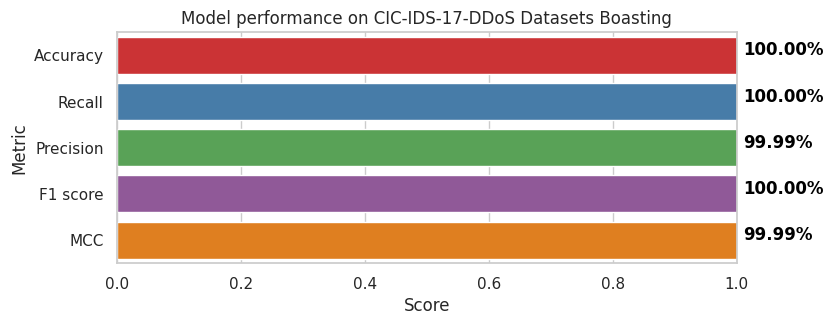

In [27]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy1, recall1, precision1, f11,mcc1]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on CIC-IDS-17-DDoS Datasets Boasting")

plt.show()


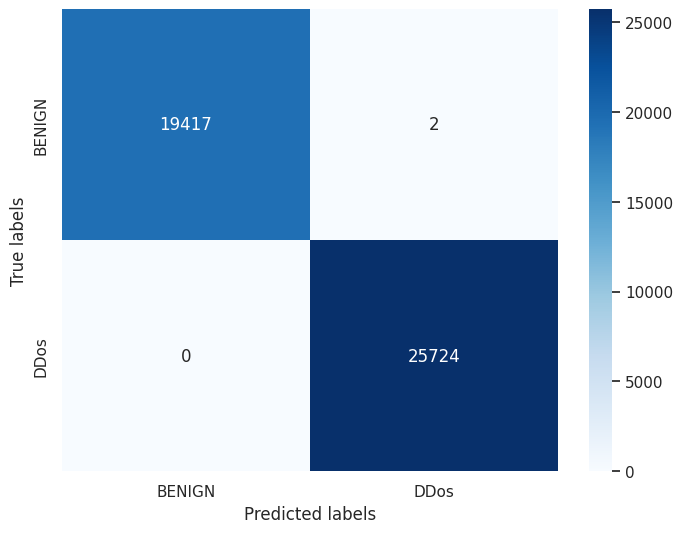

In [28]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# **Bagging** #

In [29]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [30]:
bagging = BaggingClassifier(estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)

In [31]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

In [32]:
y_pred2 =bagging.predict(X_test)

In [33]:
Accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
mcc2 = matthews_corrcoef(y_test, y_pred2)

In [34]:
print("CIC-IDS-17-DDoS Dataset Bagging")
print('Accuracy:', Accuracy2*100)
print('Recall:', recall2*100)
print('Precision:', precision2*100)
print('F1 Score:', f12*100)
print('MCC Score:', mcc2*100)

CIC-IDS-17-DDoS Dataset Bagging
Accuracy: 99.91582305119287
Recall: 99.85227802830042
Precision: 100.0
F1 Score: 99.92608441937367
MCC Score: 99.82848494848997


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


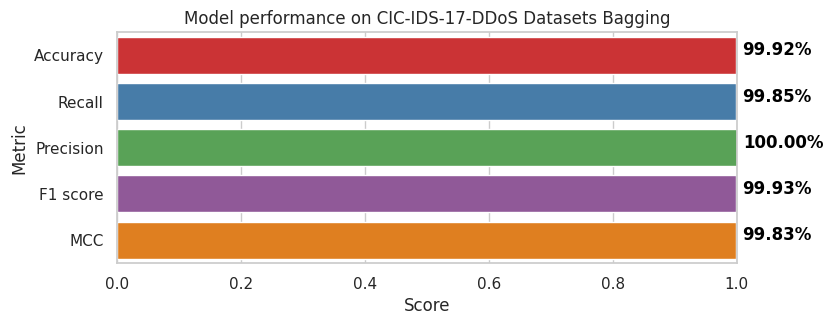

In [35]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy2, recall2, precision2, f12,mcc2]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on CIC-IDS-17-DDoS Datasets Bagging")

plt.show()


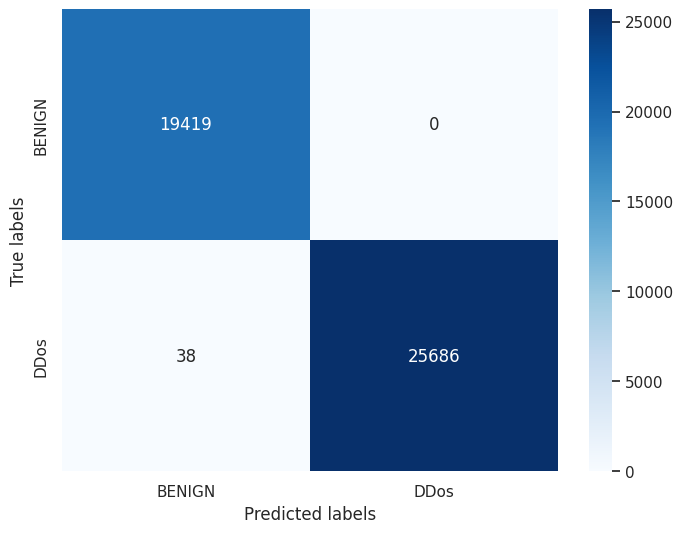

In [36]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()